In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heard-disease-prediction/Heart Disease.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#df=pd.read_csv("/content/drive/MyDrive/Heart Disease.csv")
df=pd.read_csv("../input/heard-disease-prediction/Heart Disease.csv")

In [5]:
profile = ProfileReport(df, title = 'Heart disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df.shape

(319795, 18)

In [8]:
#pip install matplotlib --upgrade

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Exploratory Data Analysis (EDA)

In [10]:
df.HeartDisease.value_counts() 

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

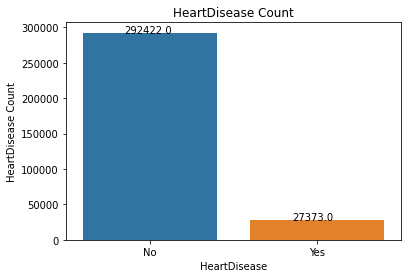

In [11]:
ax=sns.countplot(df['HeartDisease'])
# Set label for x-axis
ax.set_xlabel( "HeartDisease")

# Set Value for every count
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Set label for y-axis
ax.set_ylabel( "HeartDisease Count")
  
# Set title for plot
ax.set_title(  "HeartDisease Count")
# Display figure
plt.show()

In [12]:
No_HeartDisease  = (292422/(292422+27373)) * 100
HeartDisease = (27373/(292422+27373)) * 100

print('No HeartDisease are {} percent of total people'.format(No_HeartDisease))
print('HeartDisease present {} percent of total people'.format(HeartDisease))

No HeartDisease are 91.44045404086994 percent of total people
HeartDisease present 8.559545959130068 percent of total people


#### So, This is Imbalanced Data , Need Make Balanced.

### Visualization

In [13]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [14]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [15]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [16]:
#Note: if you are seeing this error message: AttributeError: 'AxesSubplot' object has no attribute 'bar_label', 
#it means that you do not have the right matplotlib library installed. Please execute the following code:
#!pip install matplotlib --upgrade

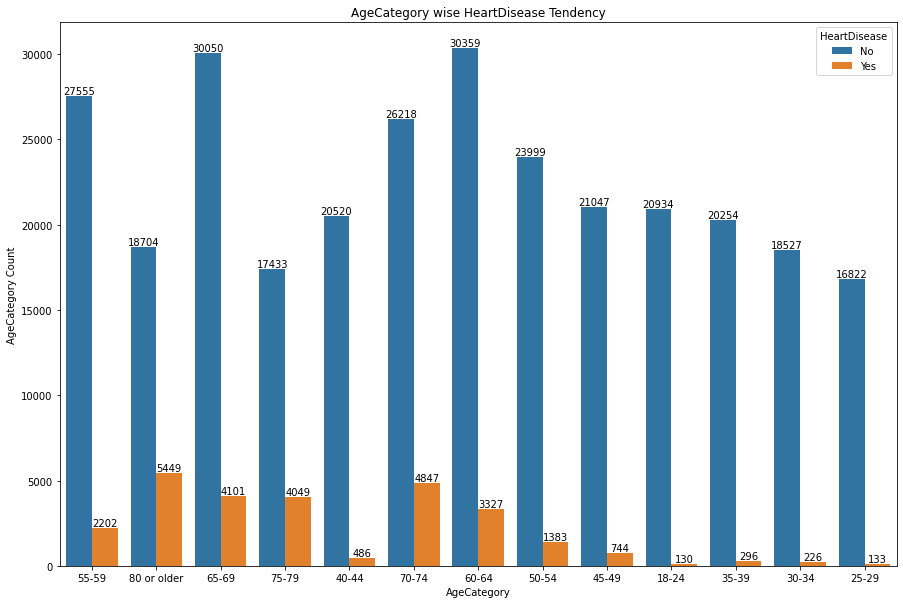

In [17]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

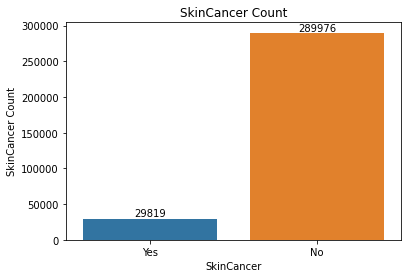

In [18]:
ax=sns.countplot(df['SkinCancer'])
ax.set_xlabel( "SkinCancer")
ax.set_ylabel( "SkinCancer Count")
ax.set_title(  "SkinCancer Count")
ax.bar_label(ax.containers[0])
plt.show()


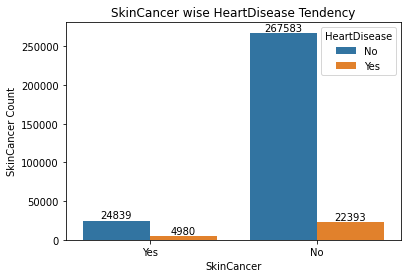

In [19]:
ax=sns.countplot(x='SkinCancer', hue='HeartDisease', data=df)
ax.set_xlabel( "SkinCancer")
ax.set_ylabel( "SkinCancer Count")
ax.set_title(  "SkinCancer wise HeartDisease Tendency")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [20]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [21]:
features=['Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

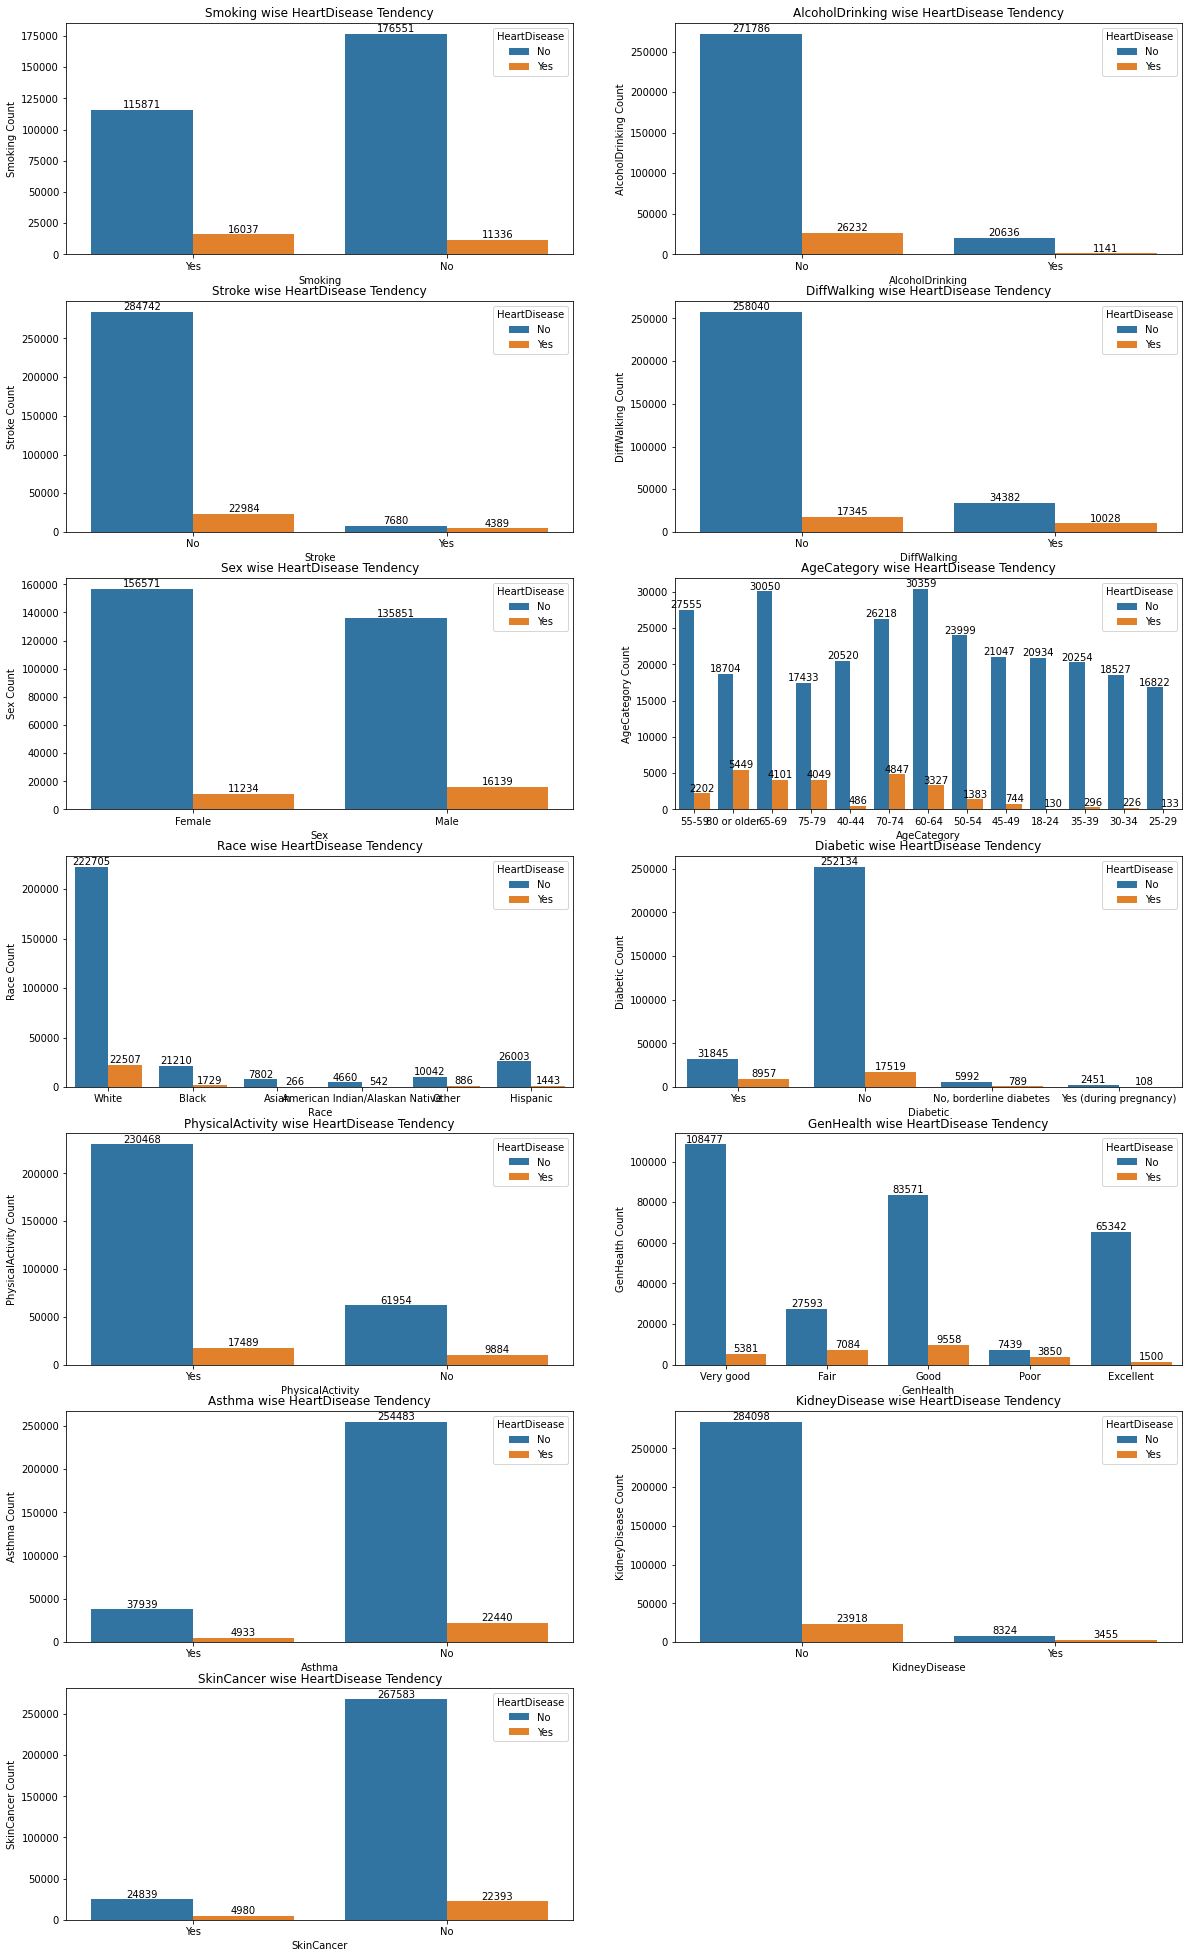

In [22]:
plt.figure(figsize=(20,40))
for i in range(1,14):

    plt.subplot(8,2,i)
    ax=sns.countplot(x=features[i-1],hue='HeartDisease',data=df)
    #ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(features[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(features[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

# Apply Feature Encoding Techniques

## Label Encoding 

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    df[column] = le.fit_transform(df[column])

In [25]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<AxesSubplot:>

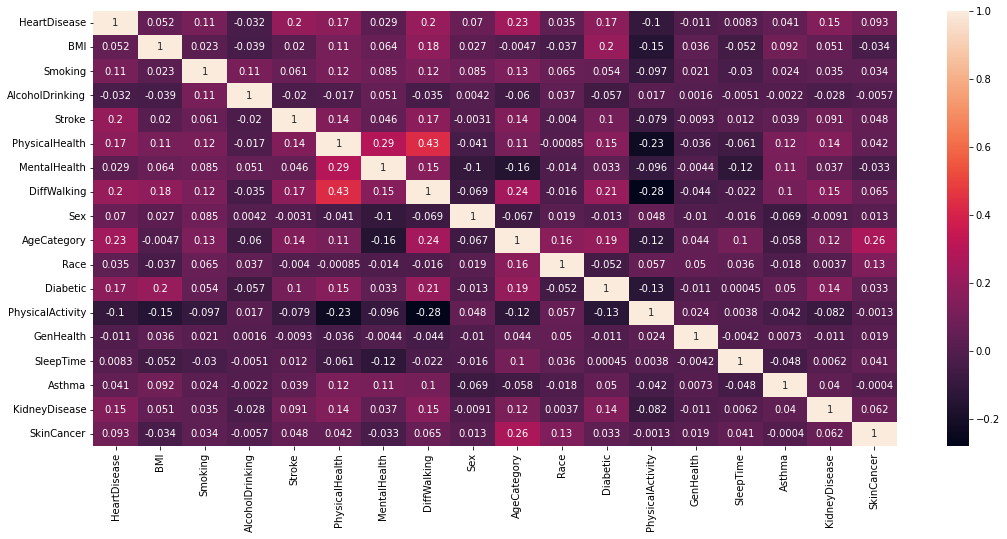

In [26]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(),annot=True)

In [27]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


## Separate X/Y values

In [28]:
X=df.drop('HeartDisease',axis=1)

In [29]:
Y=df['HeartDisease']

In [30]:
X.shape

(319795, 17)

# Without Sampling

In [31]:
from sklearn.model_selection import train_test_split as tts

In [32]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=1)

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(Xtrain,Ytrain)
logR_predict=logR.predict(Xtest)
Tr_score=logR.score(Xtrain,Ytrain)
Tst_score=logR.score(Xtest,Ytest)
print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

Complete LogisticRegression Training ! 0.9147398327496248
Complete LogisticRegression Test! 0.9152065374873618


### SVM

In [34]:
from sklearn.svm import SVC

# Choose regression method and set hyperparameter
svc=SVC(kernel='rbf',)
svc.fit(Xtrain,Ytrain)
svc_predict=svc.predict(Xtest)
svc_train_score=svc.score(Xtrain,Ytrain)
svc_test_score=svc.score(Xtest,Ytest)
print("Complete SVC Training !",svc_train_score)
print("Complete SVC Test!",svc_test_score)

Complete SVC Training ! 0.9140965620756201
Complete SVC Test! 0.9151231511689719


### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors= 50)
knn.fit(Xtrain,Ytrain)
knn_predict=knn.predict(Xtest)
knn_train_score=knn.score(Xtrain,Ytrain)
knn_test_score=knn.score(Xtest,Ytest)
print("Complete KNNClassification Training !",knn_train_score)
print("Complete KNNClassification Test!",knn_test_score)

Complete KNNClassification Training ! 0.9142618469015796
Complete KNNClassification Test! 0.9151961141975631


### XGBoost

In [37]:
from xgboost import XGBClassifier

In [38]:
xgb = XGBClassifier()
xgb.fit(Xtrain,Ytrain)
xgb_predict=xgb.predict(Xtest)
xgb_train_score=xgb.score(Xtrain,Ytrain)
xgb_test_score=xgb.score(Xtest,Ytest)
print("Complete XGBClassifier Training !",xgb_train_score)
print("Complete XGBClassifier Test!",xgb_test_score)

Complete XGBClassifier Training ! 0.9212618826388392
Complete XGBClassifier Test! 0.9160612472508574


### AdaBoost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(Xtrain,Ytrain)
ada_predict=ada.predict(Xtest)
ada_train_score=ada.score(Xtrain,Ytrain)
ada_test_score=ada.score(Xtest,Ytest)
print("Complete AdaBoost Training !",ada_train_score)
print("Complete AdaBoost Test!",ada_test_score)

Complete AdaBoost Training ! 0.9151910156529197
Complete AdaBoost Test! 0.9159257444834739


### GradientBoosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gBoost=GradientBoostingClassifier()
gBoost.fit(Xtrain,Ytrain)
gBoost_predict=gBoost.predict(Xtest)
gBoost_train_score=gBoost.score(Xtrain,Ytrain)
gBoost_test_score=gBoost.score(Xtest,Ytest)
print("Complete GradientBoosting Classifier Training ! ",gBoost_train_score)
print("Complete GradientBoosting Classifier Test!",gBoost_test_score)

Complete GradientBoosting Classifier Training !  0.9163078050175113
Complete GradientBoosting Classifier Test! 0.9166241048999886


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier()
dtclf.fit(Xtrain,Ytrain)
dtclf_predict=dtclf.predict(Xtest)
dtclf_train_score=dtclf.score(Xtrain,Ytrain)
dtclf_test_score=dtclf.score(Xtest,Ytest)
print("Complete Decision Tree Classifier Training ! ",dtclf_train_score)
print("Complete Decision Tree Classifier Test!",dtclf_test_score)

Complete Decision Tree Classifier Training !  0.9970293402901865
Complete Decision Tree Classifier Test! 0.8652894026412616


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(Xtrain,Ytrain)
rfclf_predict=rfclf.predict(Xtest)
rfclf_train_score=rfclf.score(Xtrain,Ytrain)
rfclf_test_score=rfclf.score(Xtest,Ytest)
print("Complete Random Forest Classifier Training ! ",rfclf_train_score)
print("Complete Random Forest Classifier Test!",rfclf_test_score)

Complete Random Forest Classifier Training !  0.9140965620756201
Complete Random Forest Classifier Test! 0.9151231511689719


# Accuracy function

In [43]:
def model(Xtrain,Xtest,Ytrain,Ytest):
    model_name=['LogisticRegression','SVM Classifier(SVC)','KNNClassification','XGBClassifier',
                'AdaBoostClassifier','GradientBoostingClassifier','DecisionTreeClassifier','RandomForest Classifier']
    accuracy=[]
    #LogisticRegression
    logR.fit(Xtrain,Ytrain)
    logR_predict=logR.predict(Xtest)
    accuracy.append(logR.score(Xtest,Ytest))
    print("Complete LogisticRegression !")
    
    #SVM Classifier(SVC)
    svc.fit(Xtrain,Ytrain)
    svc_predict=svc.predict(Xtest)
    accuracy.append(svc.score(Xtest,Ytest)) 
    print("Complete SVM Classifier(SVC) !")    
    
    #KNNClassification
    knn.fit(Xtrain,Ytrain)
    knn_predict=knn.predict(Xtest)
    accuracy.append(knn.score(Xtest,Ytest))
    print("Complete KNNClassification !")
                            
    #XGBClassifier
    xgb.fit(Xtrain,Ytrain)
    xgb_predict=xgb.predict(Xtest)
    accuracy.append(xgb.score(Xtest,Ytest))
    print("Complete XGBClassifier !")
                            
    #AdaBoostClassification
    ada.fit(Xtrain,Ytrain)
    ada_predict=ada.predict(Xtest)
    accuracy.append(ada.score(Xtest,Ytest))
    print("Complete AdaBoostClassification !")
                            
    #GradientBoostingClassifier
    gBoost.fit(Xtrain,Ytrain)
    gBoost_predict=gBoost.predict(Xtest)
    accuracy.append(gBoost.score(Xtest,Ytest))
    print("Complete GradientBoostingClassifier !") 
                            
    #DecisionTreeClassifier
    dtclf.fit(Xtrain,Ytrain)
    dtclf_predict=dtclf.predict(Xtest)
    accuracy.append(dtclf.score(Xtest,Ytest))
    print("Complete DecisionTreeClassifier !") 
                              
    #RandomForestClassifier
    rfclf.fit(Xtrain,Ytrain)
    rfclf_predict=rfclf.predict(Xtest)
    accuracy.append(rfclf.score(Xtest,Ytest))
    print("Complete RandomForestClassifier !") 
    
    return model_name,accuracy

In [44]:
model_name,without_sampling_accuracy=model(Xtrain,Xtest,Ytrain,Ytest)

Complete LogisticRegression !
Complete SVM Classifier(SVC) !
Complete KNNClassification !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !


In [45]:
model_name,without_sampling_accuracy

(['LogisticRegression',
  'SVM Classifier(SVC)',
  'KNNClassification',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier'],
 [0.9152065374873618,
  0.9151231511689719,
  0.9151961141975631,
  0.9160612472508574,
  0.9159257444834739,
  0.9166241048999886,
  0.8654144821188463,
  0.9151231511689719])

In [46]:
def dataframe(y):
    vis={'Algorithm Name':[i for i in model_name],
     'Accuracy':y
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

In [47]:
without_sampling=dataframe(without_sampling_accuracy)

In [48]:
without_sampling

,Algorithm Name,Accuracy
0,LogisticRegression,0.915207
1,SVM Classifier(SVC),0.915123
2,KNNClassification,0.915196
3,XGBClassifier,0.916061
4,AdaBoostClassifier,0.915926
5,GradientBoostingClassifier,0.916624
6,DecisionTreeClassifier,0.865414
7,RandomForest Classifier,0.915123


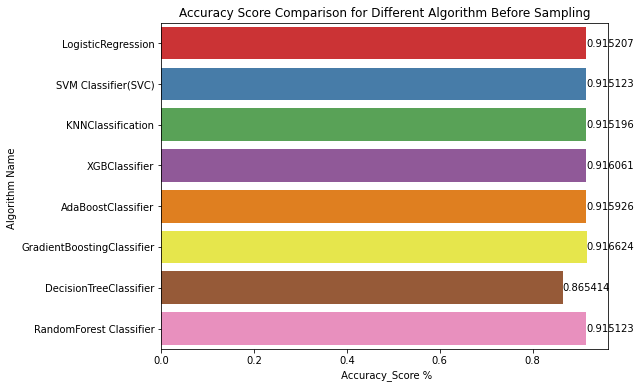

In [49]:
plt.figure(figsize = (8, 6))
ax=sns.barplot(y='Algorithm Name',x='Accuracy',data=without_sampling, palette='Set1')
#sns.set(rc = {'figure.figsize':(20, 20)})
ax.bar_label(ax.containers[0])
ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm Before Sampling")


plt.show()

In [50]:
Algo_Accuracy=without_sampling
Algo_Accuracy.rename(columns = {'Accuracy':'Without Sampling'}, inplace = True)
Algo_Accuracy

,Algorithm Name,Without Sampling
0,LogisticRegression,0.915207
1,SVM Classifier(SVC),0.915123
2,KNNClassification,0.915196
3,XGBClassifier,0.916061
4,AdaBoostClassifier,0.915926
5,GradientBoostingClassifier,0.916624
6,DecisionTreeClassifier,0.865414
7,RandomForest Classifier,0.915123


# For this Imbalanced Data sheet we Need Sampling.

### 1.  Synthetic Minority Oversampling Technique (SMOTETomek)

In [51]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [52]:
#!pip install imblearn

In [53]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

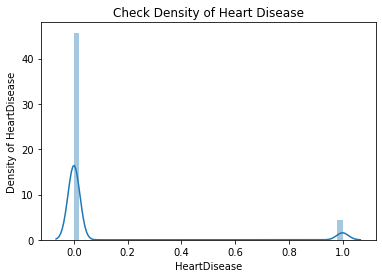

In [54]:
ax=sns.distplot(df['HeartDisease'])
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

In [55]:
from imblearn.combine import SMOTETomek
smot=SMOTETomek(random_state=42)

In [56]:
X_smot,Y_smot = smot.fit_resample(X,Y)

In [57]:
X_smot.shape

(580430, 17)

In [58]:
Y_smot.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [59]:
Y_smot.value_counts()

0    290215
1    290215
Name: HeartDisease, dtype: int64

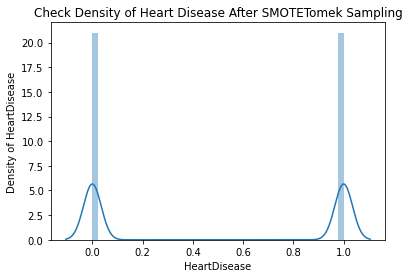

In [60]:
ax=sns.distplot(Y_smot)
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease After SMOTETomek Sampling")
plt.show()

In [61]:
smot_Xtrain,smot_Xtest,smot_Ytrain,smot_Ytest=tts(X_smot,Y_smot,train_size=0.75,random_state=42)

In [62]:
model_name,smot_accuracy=model(smot_Xtrain,smot_Xtest,smot_Ytrain,smot_Ytest)
Algo_Accuracy['SMOTETomek']=smot_accuracy
Algo_Accuracy

Complete LogisticRegression !
Complete SVM Classifier(SVC) !
Complete KNNClassification !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !


,Algorithm Name,Without Sampling,SMOTETomek
0,LogisticRegression,0.915207,0.737051
1,SVM Classifier(SVC),0.915123,0.751764
2,KNNClassification,0.915196,0.783975
3,XGBClassifier,0.916061,0.869477
4,AdaBoostClassifier,0.915926,0.782093
5,GradientBoostingClassifier,0.916624,0.813498
6,DecisionTreeClassifier,0.865414,0.876085
7,RandomForest Classifier,0.915123,0.727672
